<a href="https://colab.research.google.com/github/jcleve00/StudentMentalHealth/blob/main/StudentMentalHealth_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---



---



---



# **Student Mental Health**
By: Josh Cleveland, Josh Butcher, Trevor Angerstein


# ***Executive Summary***
The data set we selected for analysis is a survey of students at a university examining the effects of mental health on GPA. However, I decided to use the data to answer a different question. What feature could possibly predict a mental health outcome? My original hypothesis was that a person's "GPA" or how long they've been in college, "Years in College", or possibly they're "Course of Study" could predict whether or not a student answered yes to the question "Do you have depression?". After cleaning and modeling the data, using Logistic Regression and Decision Tree, I received an unexpected result. Being married turned out to be the strongest predicter of a mental health outcome, and to a lesser extant higher GPA and how long they've been at school.

# ***Introduction***
The original data set included 101 records with 11 features. The data was collected using a Google Form's survey of university students. After further research I determined the school to be the International Islamic University of Malaysia. In the following cells I will begin the data exploration and visualization process.

In [2]:
# Change to your directory
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/ColabGroupProj
!pwd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/ColabGroupProj
/content/drive/MyDrive/ColabGroupProj


# Data Dictionary
*The data dictionary is only for the features used in modeling.

In [3]:
import pandas as pd
data_dict = pd.read_csv("/content/drive/MyDrive/ColabGroupProj/MentalHealth_DataDictionary.csv")
pd.set_option('display.width', 100)
data_dict.head(7)

,Name,Modeling Data Type,Description,Unit of Measurement,I=input T=target
0,Have Depression?,Qualitative-Binary,"Responses to ""Do you have depression?""","No=0, Yes=1",T
1,GPA,Qualitative-Ordinal,"Responses to ""What is your GPA?"" Responses ran...","""3.50-4.00""=1, ""3.00-3.49""=2, ""2.50-2.99""=3, ""...",I
2,Age,Quantitative-Discrete,"Responses to ""What is your age?""",Integer number of years,I
3,Gender,Qualitative-Nominal,"Responses to ""What is your gender?""","Female, Male",I
4,Years in College,Qualitative-Ordinal,"Responses to ""What is your current year of stu...","Freshman=1, Sophmore=2, Junior=3, Senior=4",I
5,Marrital Status,Qualitative-Binary,"Responses to ""Are you married?""","No=0, Yes=1",I
6,Course of Study,Qualitative-Nominal,"Responses to ""What is your current course of s...","""Engineer"", ""Law"", ""Computer Sci."", etc.",I


# **Data Exploration and Visualization**

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

First thing I'm going to do is load the data, display the first 5 records, and change some feature names that I thought were a bit wordy or could be more precise.

In [ ]:
# Change directory to wherever your file is stored
data = pd.read_csv("/content/drive/MyDrive/ColabGroupProj/Student Mental health.csv")
# Displaying first 5 rows
data.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [ ]:
# Changing column names
data.rename({"Choose your gender":"Gender","What is your course?":"Course Study"},axis=1,inplace=True)
data.rename({"Your current year of Study":"Years in College","What is your CGPA?":"GPA"},axis=1,inplace=True)
data.rename({"Do you have Depression?":"Have Depression?","Do you have Anxiety?":"Have Anxiety?"},axis=1,inplace=True)
data.rename({"Do you have Panic attack?":"Have Panic Attacks?","Did you seek any specialist for a treatment?":"Seek Treatment?"},axis=1,inplace=True)

Next, I'll take a look at the data types. When doing this I noticed that "Age" was missing a value. After, reviewing the csv file in Excel I discovered the row and removed it, giving the data set a neat 100 records. I also removed the "Timestamp" column as it is unnecessary.

In [ ]:
# Displaying name and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Timestamp            101 non-null    object 
 1   Gender               101 non-null    object 
 2   Age                  100 non-null    float64
 3   Course Study         101 non-null    object 
 4   Years in College     101 non-null    object 
 5   GPA                  101 non-null    object 
 6   Marital status       101 non-null    object 
 7   Have Depression?     101 non-null    object 
 8   Have Anxiety?        101 non-null    object 
 9   Have Panic Attacks?  101 non-null    object 
 10  Seek Treatment?      101 non-null    object 
dtypes: float64(1), object(10)
memory usage: 8.8+ KB


In [ ]:
# Removing row with NaN value for "Age"
data.drop(index=43,inplace=True)

In [ ]:
# Removing "Timestamp" column. Not needed
data.drop("Timestamp",axis=1,inplace=True)

Next, I'll change the data's types to what is needed for our analysis. As you can see everything is an object except for "Age". I'll turn "Age" to int. With "Years in College", first I need to change the answers to a number and then change to an int type. With "GPA" the ranges given were not usable so I converted to a rank:
* 3.5-4.0 = 1
* 3.0-3.49 = 2
* 2.5-2.99 = 3
* 2.0-2.49 = 4
* 0.0-1.99 = 5

In [ ]:
# Change dtype of "Age" to int
data["Age"] = data["Age"].astype('int8')

In [ ]:
# Replacing data in "Grade Level" with just a number, in order to change dtype to int
data["Years in College"].replace({"year 1":"1"},inplace=True)
data["Years in College"].replace({"year 2":"2"},inplace=True)
data["Years in College"].replace({"year 3":"3"},inplace=True)
data["Years in College"].replace({"year 4":"4"},inplace=True)
data["Years in College"].replace({"Year 1":"1"},inplace=True)
data["Years in College"].replace({"Year 2":"2"},inplace=True)
data["Years in College"].replace({"Year 3":"3"},inplace=True)
data["Years in College"].replace({"Year 4":"4"},inplace=True)

In [ ]:
# Changing dtype "Grade Level" to int
data["Years in College"] = data["Years in College"].astype('int8')

In [ ]:
# Changing "GPA" range to rank.
data["GPA"].replace({"3.50 - 4.00":1,"3.00 - 3.49":2,"2.50 - 2.99":3,"2.00 - 2.49":4,"0 - 1.99":5},inplace=True)

In [ ]:
# For some reason row [6] would not change to 1, so working around
data.at[6,"GPA"]=1

In [ ]:
data["GPA"] = data["GPA"].astype("int8")

Here, I got a little ahead of myself and went ahead and changed the "Yes" and "No" responses to binary in preparation for Logistic Regression modeling later: "Yes" = 1, "No" =0

In [ ]:
# Change Yes or No to binary. 1=Yes, 0=No. Need it like this for logical regression.
data = data.replace({"Marital status":{"Yes": 1, "No":0}})
data = data.replace({"Have Depression?":{"Yes":1, "No":0}})
data = data.replace({"Have Anxiety?":{"Yes": 1, "No":0}})
data = data.replace({"Have Panic Attacks?":{"Yes": 1, "No":0}})
data = data.replace({"Seek Treatment?":{"Yes": 1, "No":0}})

# Change dtype to int8
data["Marital status"]=data["Marital status"].astype("int8")
data["Have Depression?"]=data["Have Depression?"].astype("int8")
data["Have Anxiety?"]=data["Have Anxiety?"].astype("int8")
data["Have Panic Attacks?"]=data["Have Panic Attacks?"].astype("int8")
data["Seek Treatment?"]=data["Seek Treatment?"].astype("int8")

After, running .describe() you can see the only meaningful information is for Age. The average Age is about 20. There doesn't appear to be any extreme outliers, as the max age of 24 is within 2 standard deviations of the mean. But, half are 18 or 19.

In [ ]:
data.describe()

,Age,Years in College,GPA,Marital status,Have Depression?,Have Anxiety?,Have Panic Attacks?,Seek Treatment?
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,20.53000,1.980000,1.690000,0.160000,0.350000,0.340000,0.330000,0.060000
std,2.49628,0.994734,0.884148,0.368453,0.479372,0.476095,0.472582,0.238683
min,18.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19.00000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,23.00000,3.000000,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,24.00000,4.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000


After taking a look at the value counts for the features you can see that 75% are female and 53% are age 18 or 19. Looking at the "Course Study" value_counts you can see a lot of issues with how the responses were entered. After examining the document in Excel as well as some research online I was able to determine which Courses were likely meant to be counted together. 42% of students are in their first year. 16% are married and 35% have depression, which will be the target in later analysis.

In [ ]:
data["Gender"].value_counts()

Female    75
Male      25
Name: Gender, dtype: int64

In [1]:
data["Age"].value_counts()

NameError: name 'data' is not defined

In [ ]:
data["Course Study"].value_counts()

BCS                        18
Engineering                17
BIT                         9
Biomedical science          4
KOE                         4
BENL                        2
Laws                        2
psychology                  2
Engine                      2
Islamic Education           1
Biotechnology               1
engin                       1
Econs                       1
MHSC                        1
Malcom                      1
Kop                         1
Human Sciences              1
Communication               1
Nursing                     1
Diploma Nursing             1
IT                          1
Pendidikan Islam            1
Radiography                 1
Fiqh fatwa                  1
DIPLOMA TESL                1
Koe                         1
Fiqh                        1
CTS                         1
koe                         1
Benl                        1
Kirkhs                      1
Mathemathics                1
Pendidikan islam            1
Human Reso

In [ ]:
data["Years in College"].value_counts()

1    42
2    26
3    24
4     8
Name: Years in College, dtype: int64

In [ ]:
data["Marital status"].value_counts()

0    84
1    16
Name: Marital status, dtype: int64

In [ ]:
data["Have Depression?"].value_counts()

0    65
1    35
Name: Have Depression?, dtype: int64

In [ ]:
# Cleaning up the Course Study names. Discovered data was collected from
# International Islamic University of Malaysia. Had to research some of the acronyms, but I think
# I got everything in the right place now.
data["Course Study"]= data["Course Study"].replace(['Engine','engin','KOE','koe','Koe','ENM'],'Engineering')
data["Course Study"]= data["Course Study"].replace(['Biotechnology'],'Biomedical science')
data["Course Study"]= data["Course Study"].replace(['Laws','Fiqh fatwa ','Fiqh'],'Law')
data["Course Study"]= data["Course Study"].replace(['IT','BIT'],'Bus. Info Tech')
data["Course Study"]= data["Course Study"].replace(['psychology','Kop','KIRKHS','Kirkhs','Irkhs','Human Sciences ','Human Sciences'],'Psychology')
data["Course Study"]= data["Course Study"].replace(['Diploma Nursing'],'Nursing ')
data["Course Study"]= data["Course Study"].replace(['benl','Benl','BENL'],'English')
data["Course Study"]= data["Course Study"].replace(['BCS'],'Computer Sci.')
data["Course Study"]= data["Course Study"].replace(['Pendidikan Islam ','Pendidikan Islam','Usuluddin ','Malcom','Pendidikan islam','Islamic education'],'Islamic Education')
data["Course Study"]= data["Course Study"].replace(['KENMS','Econs'],'Economics')
data["Course Study"]= data["Course Study"].replace(['DIPLOMA TESL'],'TAASL')

In [ ]:
# value_counts with adjusted data
data["Course Study"].value_counts()

Engineering                27
Computer Sci.              18
Bus. Info Tech             10
Psychology                  8
Islamic Education           7
Biomedical science          5
Law                         5
English                     3
Nursing                     2
Economics                   2
TAASL                       2
Communication               1
MHSC                        1
CTS                         1
Banking Studies             1
ALA                         1
Business Administration     1
Marine science              1
Accounting                  1
Human Resources             1
Mathemathics                1
Radiography                 1
Name: Course Study, dtype: int64

Next, I'll visualize some of the data. First, I'll confirm there are no significant outliers for "Age" with a box plot. Then I'll use some bar plots to visualize the attribute counts and compare them.

<Axes: >

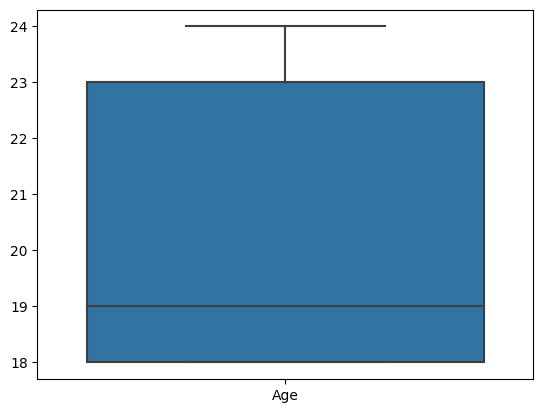

In [ ]:
sns.boxplot(data=data[['Age']])

As you can see below, there appears to be a correlation between higher "GPA" ranks(specifically rank 1 and 2) and depression across almost all age groups. This could make sense as people with higher GPA's might typically be more concerned about their grades in general. Before looking at the chart I had thought there would be more instances of depression with the lower performing students.

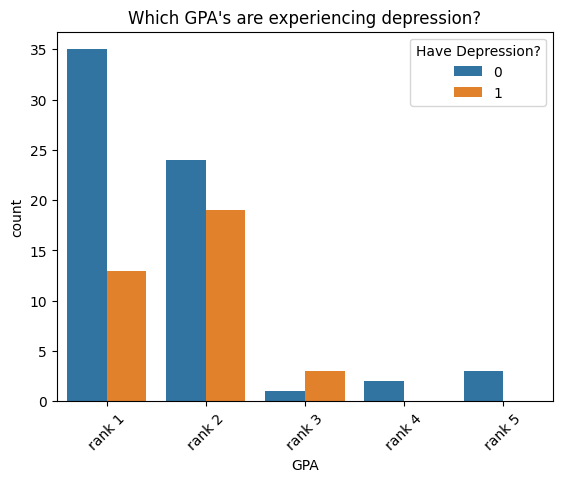

In [ ]:
# Examining distribution of students with a certain GPA and Depression
cp=sns.countplot(x='GPA', data=data, hue='Have Depression?')
cp.set(xticklabels=["rank 1","rank 2","rank 3","rank 4","rank 5"])
plt.xticks(rotation=45)
plt.title("Which GPA's are experiencing depression?")
plt.show()

Below you can see the youngest and oldest students have the most instances of depression, with the middle experiencing very little. That could make sense as starting college can be a difficult adjustment. And, similarly, finishing your degree can also be stressful. But as you'll see in the next chart while 1st year students experience a considerable amount of depression those in their last year do not.

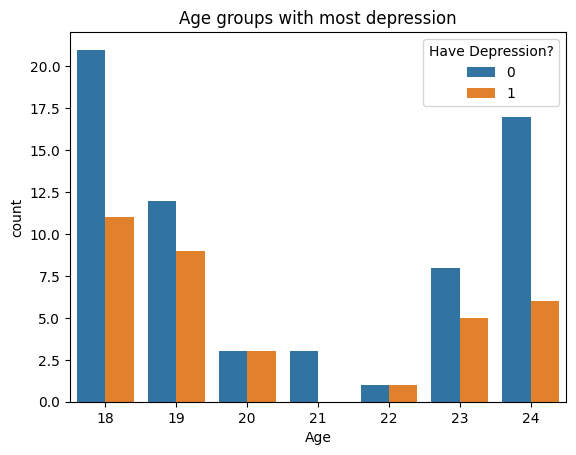

In [ ]:
sns.countplot(x='Age', data=data, hue='Have Depression?')
plt.title('Age groups with most depression')
plt.show()

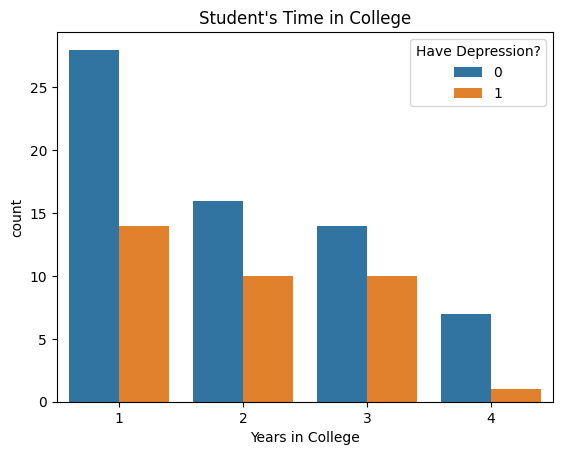

In [ ]:
sns.countplot(x='Years in College', data=data, hue='Have Depression?')
plt.title("Student's Time in College")
plt.show()

Engineering degrees have the most instance of depression, but are also over represented in the sample. I thought that Bus. Info Tech was interesting as 50% of them are experiencing depression.

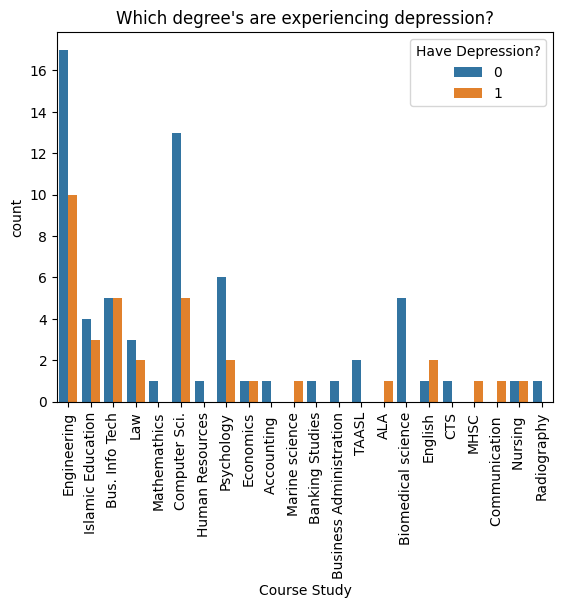

In [ ]:
sns.countplot(x='Course Study', data=data, hue='Have Depression?')
plt.xticks(rotation=90)
plt.title("Which degree's are experiencing depression?")
plt.show()

In [ ]:
data.to_csv('StudentMentalHealthDU.csv',index=False)

# ***Data Preparation***
I have already completed some preparation along the way through the Exploration phase, but will now finish preparing the data for modeling. First, I'll load the data i saved from the previous phase and save it as a copy. After displaying the first 5 records I noticed an index feature that needs to be removed.

In [ ]:
import pandas as pd
import seaborn as sns

# Loading data saved in the Exploration phase and saving a copy to proceed
mental = pd.read_csv("/content/drive/MyDrive/ColabGroupProj/StudentMentalHealthDU.csv")

In [ ]:
mental.to_csv('StudentMentalHealth_copy.csv',index=False)

In [ ]:
# Make sure it's all there
mental.head()

,Gender,Age,Course Study,Years in College,GPA,Marital status,Have Depression?,Have Anxiety?,Have Panic Attacks?,Seek Treatment?
0,Female,18,Engineering,1,2,0,1,0,1,0
1,Male,21,Islamic Education,2,2,0,0,1,0,0
2,Male,19,Bus. Info Tech,1,2,0,1,1,1,0
3,Female,22,Law,3,2,1,1,0,0,0
4,Male,23,Mathemathics,4,2,0,0,0,0,0


# Change Column Names
In the previous phase I changed column names to be more succinct: Choose your gender|Gender, What is your course of study?|Course Study, Your current year of study|Years in College, What is your CGPA?|GPA, Do you have depression?|Have Depression?, Do you have anxiety?|Have anxiety?, Do you have panic attacks?|Have Panic Attacks?, Did you seek any specialist for treatment?|Seek Treatment?

# Handle Missing Values
In the previous phase I removed one row with missing value for "Age". With the relatively large sample size removing one record shouldn't effect the outcome.

# Correct Qualitative Errors
In the previous phase I corrected the issues with qualitative data, such as with "Course Study". I also, changed the "GPA" to rank, "Years of Study" to a single digit and fixed some issues with people typing an extra space or a capital Y or lower case y in yes in their responses. Next, I'll double check everything adds up and there are no missing or erroneous values.

In [ ]:
mental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               100 non-null    object
 1   Age                  100 non-null    int64 
 2   Course Study         100 non-null    object
 3   Years in College     100 non-null    int64 
 4   GPA                  100 non-null    int64 
 5   Marital status       100 non-null    int64 
 6   Have Depression?     100 non-null    int64 
 7   Have Anxiety?        100 non-null    int64 
 8   Have Panic Attacks?  100 non-null    int64 
 9   Seek Treatment?      100 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 7.9+ KB


In [ ]:
mental["Gender"].value_counts()

Female    75
Male      25
Name: Gender, dtype: int64

In [ ]:
mental["Age"].value_counts()

18    32
24    23
19    21
23    13
20     6
21     3
22     2
Name: Age, dtype: int64

In [ ]:
mental["Course Study"].value_counts()

Engineering                27
Computer Sci.              18
Bus. Info Tech             10
Psychology                  8
Islamic Education           7
Biomedical science          5
Law                         5
English                     3
Nursing                     2
Economics                   2
TAASL                       2
Communication               1
MHSC                        1
CTS                         1
Banking Studies             1
ALA                         1
Business Administration     1
Marine science              1
Accounting                  1
Human Resources             1
Mathemathics                1
Radiography                 1
Name: Course Study, dtype: int64

In [ ]:
mental["Years in College"].value_counts()

1    42
2    26
3    24
4     8
Name: Years in College, dtype: int64

In [ ]:
#Reminder that I changed GPA to a rank. "3.50 - 4.00":1,"3.00 - 3.49":2,"2.50 - 2.99":3,"2.00 - 2.49":4,"0 - 1.99":5
mental['GPA'].value_counts()

1    48
2    43
3     4
5     3
4     2
Name: GPA, dtype: int64

In [ ]:
mental["Marital status"].value_counts()

0    84
1    16
Name: Marital status, dtype: int64

In [ ]:
mental["Have Depression?"].value_counts()

0    65
1    35
Name: Have Depression?, dtype: int64

# Handle Outliers
There were no significant outliers in this data set.

<Axes: >

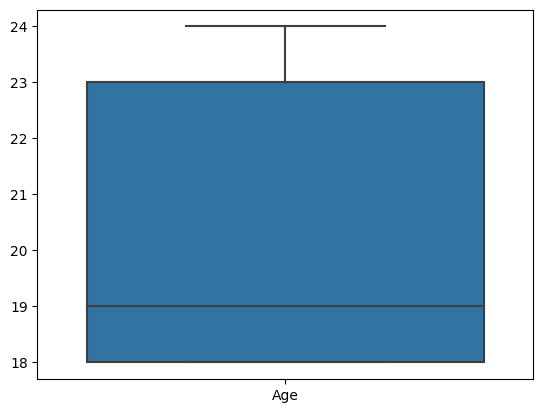

In [ ]:
sns.boxplot(mental[['Age']])

# Handle Multicollinearity
Two sets of features have multicollinearity: "Have Depression?", "Have Anxiety?", "Have Panic Attacks?" and "Age", "Years in College". As you can see in the value counts above the results of those three questions from the first set are almost identical. It stands to reason that a person suffering from one could likely be suffering from all three. Im dropping "Have Anxiety?" and "Have Panic Attacks?" as they are basically the same thing. Also, "Have Depression?" has the most positive responses to work with.

 "Age" and "Years in College" are also very similar. How old you are typically indicates how many years you've been in college, though as you've seen in the visualization phase, just because one is older doesn't mean they are in there last year of school. I'm going to drop "Age" because I'm more interested in how the experience of college is affecting student's mental health, rather than how their age might contribute.


In [ ]:
mental.drop("Have Anxiety?",axis=1,inplace=True)
mental.drop("Have Panic Attacks?",axis=1,inplace=True)
mental.drop(['Age'],axis=1,inplace=True)

# Rename target to Depression to make it as succint as possible
mental.rename(columns={'Have Depression?':'Depression'},inplace=True)

# Encoding Qualitative Data
In the previous phase I manually changed "Yes" and "No" responses to binary. Now, I'll use LabelEncoder to do the same to "Gender" and use OneHotEncoder to encode the "Course Study" responses.

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
mental_copy = mental.copy(deep=True)# Create deep copy to encode 'Gender' column
mental_copy['Gender_Encoded'] = label_encoder.fit_transform(mental['Gender'])
mental_copy
one_hot_course = pd.get_dummies(mental_copy['Course Study'])# One hot encoding the Course Study feature
mental_copy = mental_copy.join(one_hot_course)

In [ ]:
# Dropping columns no longer using
mental_copy.drop(['Course Study'],axis =1,inplace=True)

In [ ]:
mental_copy.drop(['Seek Treatment?'],axis =1,inplace=True)

In [ ]:
# Display prepared data
mental_copy.head()

,Gender,Years in College,GPA,Marital status,Depression,Gender_Encoded,ALA,Accounting,Banking Studies,Biomedical science,...,Human Resources,Islamic Education,Law,MHSC,Marine science,Mathemathics,Nursing,Psychology,Radiography,TAASL
0,Female,1,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Male,2,2,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,Male,1,2,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Female,3,2,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Male,4,2,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
mental_copy.to_csv('MentalHealth_Prepped.csv',index=False)

# ***Data Modeling***
  For data modeling I will use Logistic Regression and Decision Tree Classification. The goal is to see which input features are most influential on "Depression". After initially choosing to use a Logistic Regression model, I chose to supplement my analysis with the Decision Tree to see if I ended up with a similar result. My original hypothesis was that "GPA" and/or "Years in College" would play a role in determining a student's mental health outcome. But that turned out to be only partially correct. Surprisingly, marriage is the most influential variable in determining instances of depression at the International Islamic University of Malaysia. Are student's unhappy in their marriages, or are those students who are depressed more likely to get married? Unfortunately, the answer to that question is beyond the scope of this analysis.


In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot

mental = pd.read_csv('/content/drive/MyDrive/ColabGroupProj/MentalHealth_Prepped.csv')

In [ ]:
mental.head()

,Gender,Years in College,GPA,Marital status,Depression,Gender_Encoded,ALA,Accounting,Banking Studies,Biomedical science,...,Human Resources,Islamic Education,Law,MHSC,Marine science,Mathemathics,Nursing,Psychology,Radiography,TAASL
0,Female,1,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Male,2,2,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,Male,1,2,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Female,3,2,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Male,4,2,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


# Logistic Regression


I'm using a Logistic Regression model because the target variable is a binary classification: Does one have depression? Or not?

Features used:
* Years in College - Could first year students have more mental health issues? Homesick?
* GPA - Could low achievers have more mental health issues?
* Marital status - Could mental health problems come from outside of school?
* Gender(Encoded) - Does being male or female predict mental health problems?
* Course Study(one_hot_encoded)Might a particular field of study predict mental health problems? After reviewing value_counts above I determined which had less than 5 responses and dropped them. I did this to help prevent over fitting the model.

In [ ]:
# dropping course's of study that have less than 5 responses
mental.drop(['English','Nursing ','Economics','TAASL','Communication ','MHSC','CTS','Banking Studies',\
                  'ALA','Business Administration','Marine science','Accounting ','Human Resources',\
                  'Mathemathics','Radiography'],axis=1,inplace=True)
# Drop gender column, not needed
mental.drop(['Gender'],axis =1,inplace=True)

# Train_Test_Split

In [ ]:
feature_set = ['Years in College', 'GPA', 'Bus. Info Tech',
       'Marital status','Psychology','Computer Sci.','Engineering', 'Law']
features = mental[feature_set]
target = mental.Depression

from sklearn.model_selection import train_test_split

feature_train, feature_test, target_train, target_test = \
train_test_split(features,target,test_size=0.3,random_state=1)

# Run Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
logreg = LogisticRegression(class_weight = 'balanced',solver = 'lbfgs')# Using 'balanced' paramenter because there are
                                                                       # a lot of no responses(https://medium.com/@curryrowan/simplified-logistic-regression-classification-with-categorical-variables-in-python-1ce50c4b137)
logreg.fit(feature_train, target_train)
predictions = logreg.predict(feature_test)



# ***Logistic Model Assumptions***

* Binary Target - Target is binary.
* Independence - variables are independent.
* No Multicollinearity - correlation matrix shows no significant collinearity.
* No Extreme Outliers - Ran boxplots previously. No significant outliers.
* Linearity - Removed non-linear features. The following charts show linearity, albeit moderately.
* Sufficient Data - 100 records sufficient.

<Axes: >

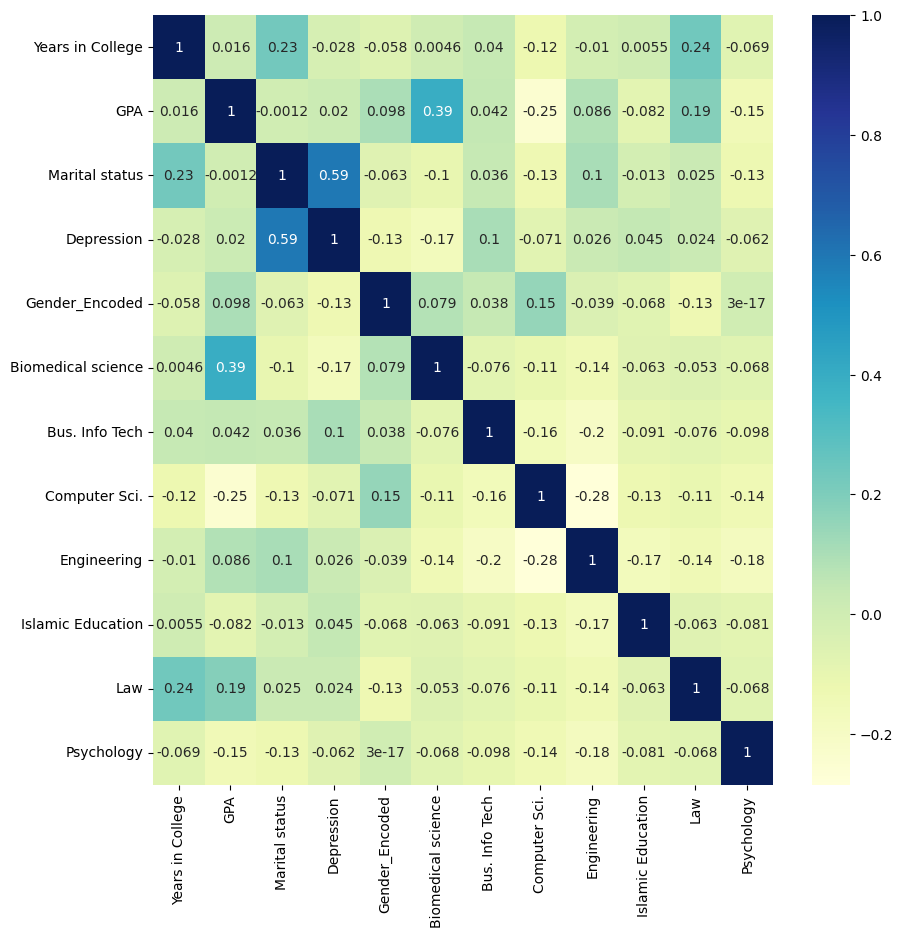

In [ ]:
# Double check for multicollinearity
corr = mental.corr()
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, annot=True,cmap='YlGnBu')

# ***Visualization and Interpretation of the Model***

<Axes: xlabel='Years in College', ylabel='Depression'>

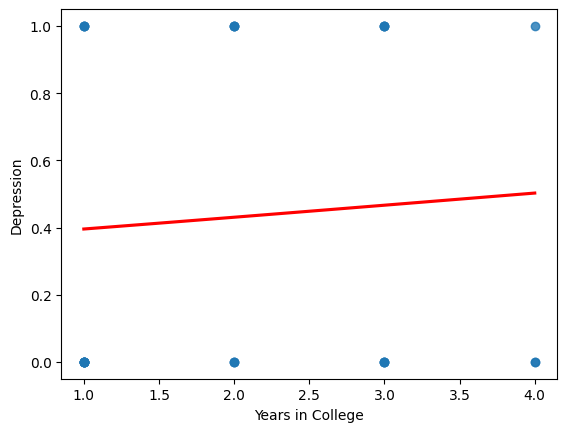

In [ ]:
sns.regplot(x=feature_test['Years in College'], y=target_test, data=features,# Linear
            line_kws={'color':'red'}, logistic=True, ci=None)

<Axes: xlabel='GPA', ylabel='Depression'>

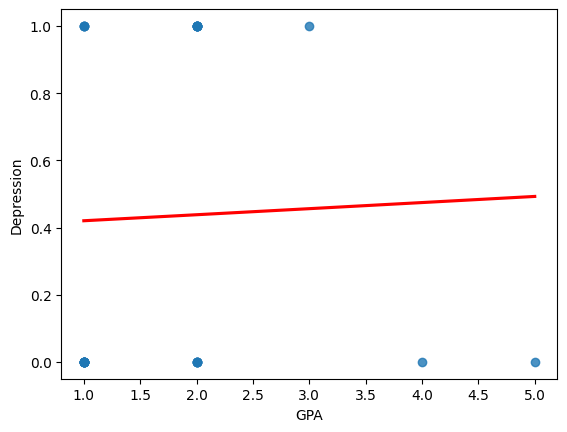

In [ ]:
sns.regplot(x=feature_test['GPA'], y=target_test, data=features,# Linear
            line_kws={'color':'red'}, logistic=True, ci=None)

<Axes: xlabel='Marital status', ylabel='Depression'>

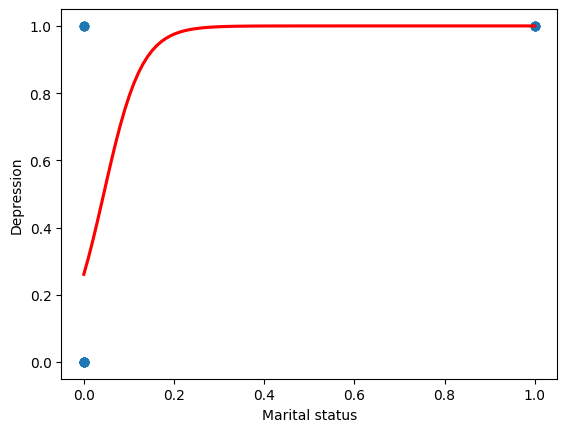

In [ ]:
sns.regplot(x=feature_test['Marital status'], y=target_test, data=features,# Linear
            line_kws={'color':'red'}, logistic=True, ci=None)

<Axes: xlabel='Bus. Info Tech', ylabel='Depression'>

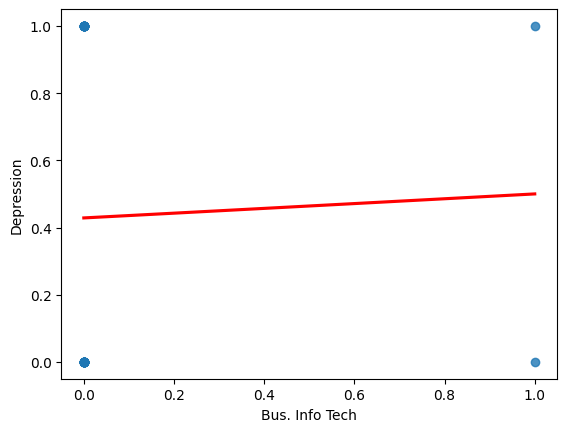

In [ ]:
sns.regplot(x=feature_test['Bus. Info Tech'], y=target_test, data=features,#Linear
            line_kws={'color':'red'}, logistic=True, ci=None)

<Axes: xlabel='Engineering', ylabel='Depression'>

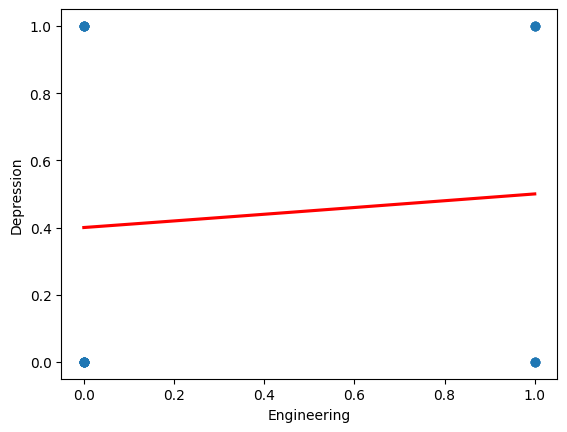

In [ ]:
sns.regplot(x=feature_test['Engineering'], y=target_test, data=features,# Linear
            line_kws={'color':'red'}, logistic=True, ci=None)

# Determine most influential variable

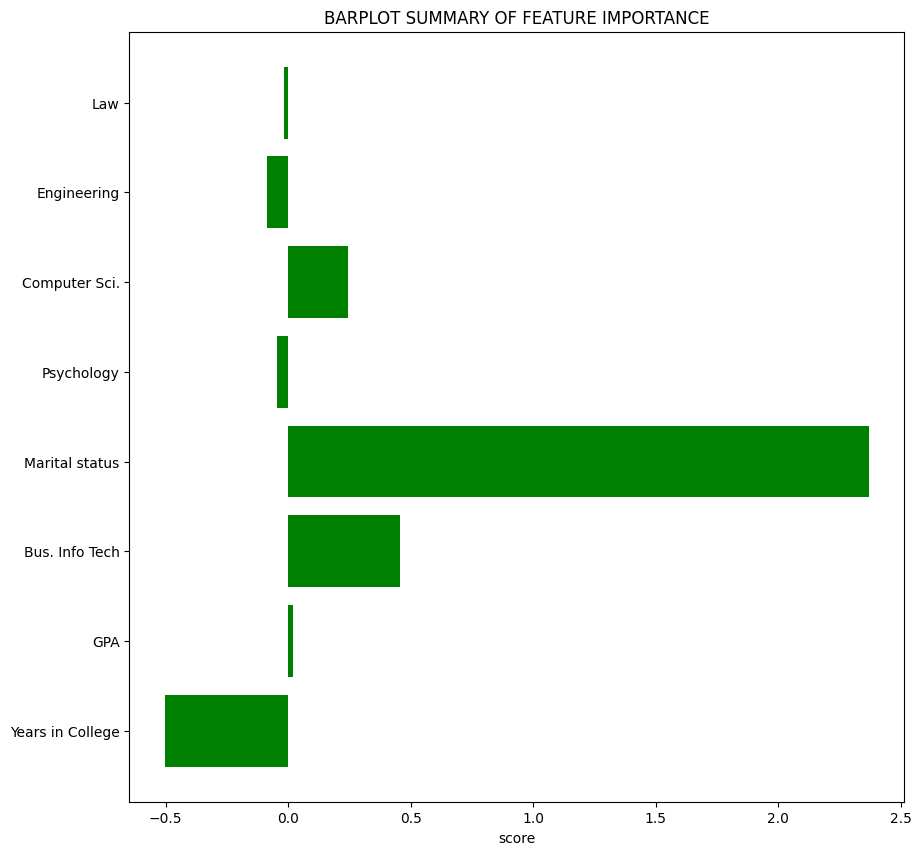

In [ ]:
weight = logreg.coef_
flat_weight = weight.flatten()

# Have to create variable without depression column for barplot

pyplot.rcParams["figure.figsize"]=(10,10)
pyplot.barh(features.columns, flat_weight,color = 'g')
pyplot.title("BARPLOT SUMMARY OF FEATURE IMPORTANCE")
pyplot.xlabel("score")
pyplot.show()

  As you can see above, "Marital status" is by far the most influential variable. "Marital status" appears to be a good predictor of having depression, while studying "Bus. Info Tech" or "Computer Sci." also moderately predict "Depression". Also, as the number of "Years in College" goes up the odds of "Depression" go down, hence the negative coefficient.

# ***Evaluation of Model Strength***

  The model's accuracy score is 76.66. With only 2 False Positives and 5 False Negatives the model did a reasonably good job of predicting the "Depression" feature.

Logistic Model Accuracy: 0.7666666666666667

Confusion matrix = 
[[15  2]
 [ 5  8]]

True Positives  | False Positives

----------------|----------------

False Negatives | True Negatives 



<Axes: >

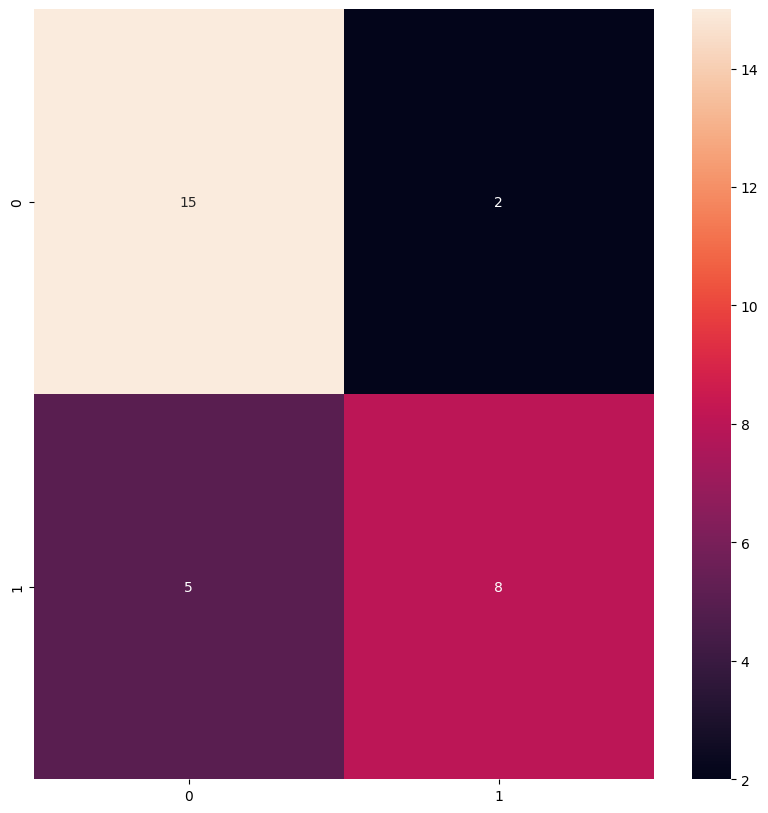

In [ ]:
print(f'Logistic Model Accuracy: {accuracy_score(target_test, predictions)}\n')# Accuracy score

print(f'Confusion matrix = \n{confusion_matrix(target_test, predictions)}\n')# Confusion matrix
print(f'True Positives  | False Positives\n')
print(f'----------------|----------------\n')
print(f'False Negatives | True Negatives \n')

cm = confusion_matrix(target_test, predictions)
sns.heatmap(cm, annot=True, fmt='d')

# Logistic Regression Conclusion
  After running the Logistic Regression Model "Marital status" appears to be a very strong predictor of having "Depression", at least at the International Islamic University of Malaysia. "Bus. Info Tech" and "Computer Sci." degrees may also moderately predict having "Depression". Furthermore, the longer one attends this University the better the odds they will not respond in the affirmative to the question "Do you have depression?". Interestingly, "GPA" didn't appear to play as much of a role in predicting "Depression", in the Logistic Model, as I thought it would.



---



# Decision Tree Classifier
For the Decision Tree the question is the same; Which independent feature influences the target(Depression) the most? One of the main differences with this approach is that I'm using all features and letting the Decision Tree come to it's own conclusions about which ones are most relevent.

First I'll load the data set from the beginning of the Preparation phase so that I have all of the features I want.

In [ ]:
mental_tree = pd.read_csv('/content/drive/MyDrive/ColabGroupProj/StudentMentalHealth_copy.csv')


In [ ]:
mental_tree.head()

,Gender,Age,Course Study,Years in College,GPA,Marital status,Have Depression?,Have Anxiety?,Have Panic Attacks?,Seek Treatment?
0,Female,18,Engineering,1,2,0,1,0,1,0
1,Male,21,Islamic Education,2,2,0,0,1,0,0
2,Male,19,Bus. Info Tech,1,2,0,1,1,1,0
3,Female,22,Law,3,2,1,1,0,0,0
4,Male,23,Mathemathics,4,2,0,0,0,0,0


Then I need to re-encode "Gender" and "Course Study".

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
mental_tree_copy = mental_tree.copy(deep=True)# Create deep copy to encode 'Gender' column
mental_tree_copy['Gender_Encoded'] = label_encoder.fit_transform(mental_tree['Gender'])
mental_tree_copy

mental_tree_copy = mental_tree_copy.join(one_hot_course)

In [ ]:
# Drop columns not using and rename "Have Depression?" to "Depression"
mental_tree_copy.drop(['Gender','Course Study'],axis =1,inplace=True)
mental_tree_copy.drop(columns=['Have Anxiety?', 'Have Panic Attacks?','Seek Treatment?'],axis=1,inplace=True)
mental_tree_copy.rename(columns={'Have Depression?':'Depression'},inplace=True)

# Train_Test_Split

In [ ]:
feature_set = ['Age', 'Years in College', 'GPA',
       'Marital status','Gender_Encoded','ALA', 'Accounting ',
       'Banking Studies', 'Biomedical science', 'Bus. Info Tech',
       'Business Administration', 'CTS', 'Communication ', 'Computer Sci.',
       'Economics', 'Engineering', 'English', 'Human Resources',
       'Islamic Education', 'Law', 'MHSC', 'Marine science', 'Mathemathics',
       'Nursing ', 'Psychology', 'Radiography', 'TAASL']
features = mental_tree_copy[feature_set]
target = mental_tree_copy.Depression

from sklearn.model_selection import train_test_split
feature_train, feature_test, target_train,target_test = \
  train_test_split(features, target, test_size=0.33,random_state=1)

# Run Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

model = DecisionTreeClassifier(max_depth=5)

model.fit(feature_train,target_train)
predictions = model.predict(feature_test)

# ***Decision Tree Assumptions Satisfied***
* All features are categorical - Yes
* Binary target - Yes

# ***Visualization and Interpretation of the Model***

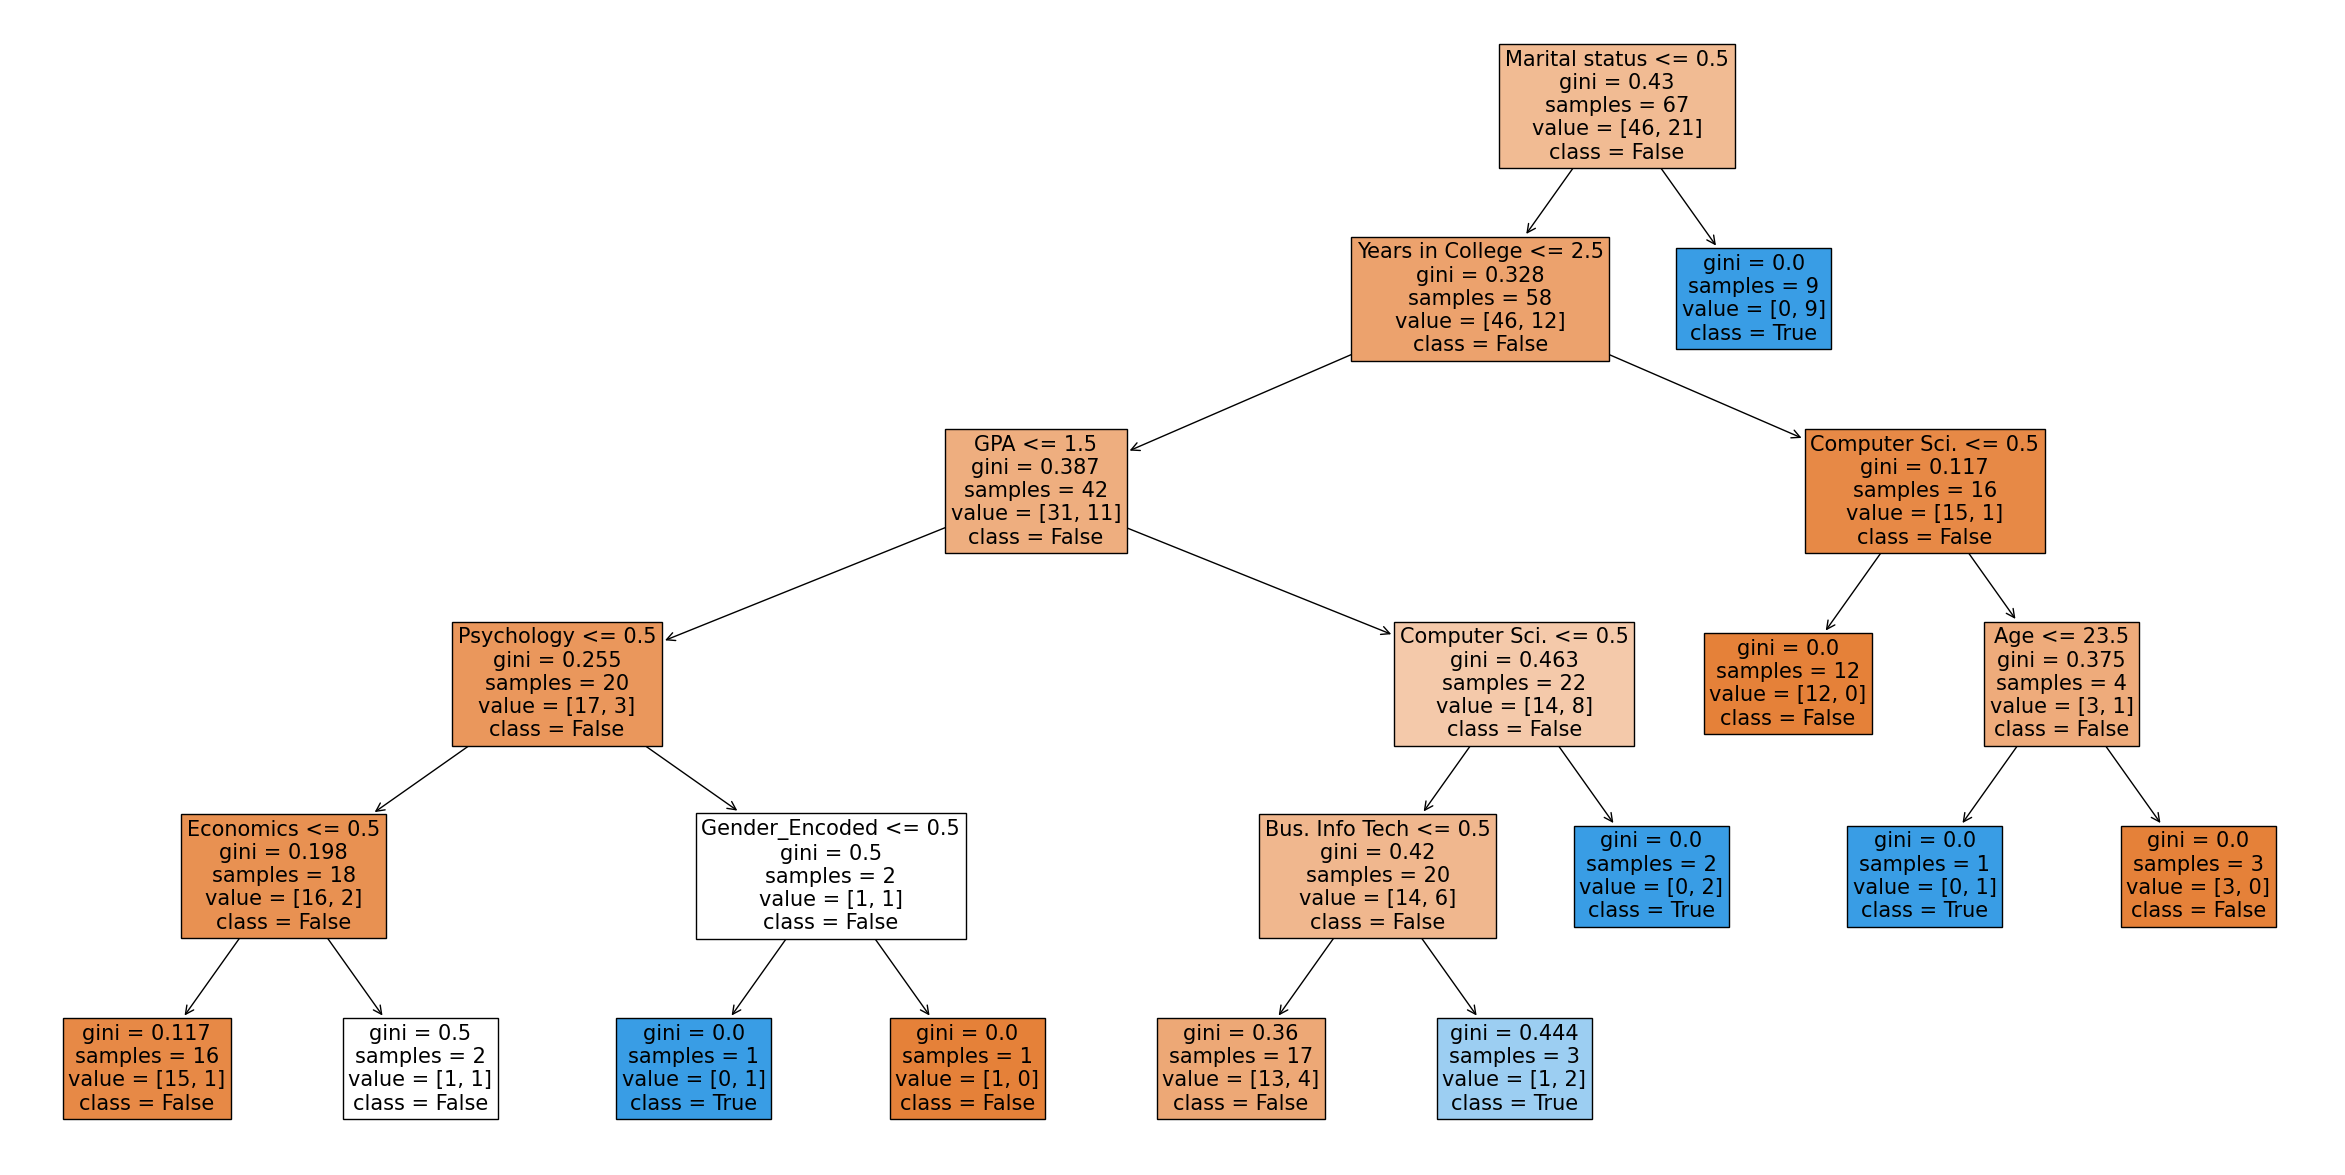

In [ ]:
from pandas.core.strings.accessor import F
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(30,15))
diab_tree = tree.plot_tree(model,
                           feature_names=feature_set,
                           class_names= ['False','True'],
                           filled=True,
                           fontsize=15)

# ***Evaluation of Model Strength***

The F1-score for the Decision Tree was better for the False(Not Depressed) samples at .77 than the True(Depressed) samples at .67. This could be because of the imbalance between False(65) and True(35) samples in the data set. The AUC score is in the Fair/Acceptable range at .72. With 4 False Positives and 5 False Negatives, and taking into account the F1-score and AUC, the Decision Tree did reasonably well at predicting instances of "Depression".

In [ ]:
print("Accuracy:",accuracy_score(target_test, predictions))
# Calculate model precision
print("Precision:",precision_score(target_test, predictions))
# Calculate model recall
print("Recall:",recall_score(target_test, predictions))
# Calculate model f1 score
print("F1-Score:",f1_score(target_test, predictions))
# Create classification report
print()
print(classification_report(target_test, predictions, target_names=['Not Depressed','Depressed']))

Accuracy: 0.7272727272727273
Precision: 0.6923076923076923
Recall: 0.6428571428571429
F1-Score: 0.6666666666666666

               precision    recall  f1-score   support

Not Depressed       0.75      0.79      0.77        19
    Depressed       0.69      0.64      0.67        14

     accuracy                           0.73        33
    macro avg       0.72      0.72      0.72        33
 weighted avg       0.73      0.73      0.73        33



True Negatives  | False Positives

----------------|----------------

False Negatives | True Positives 




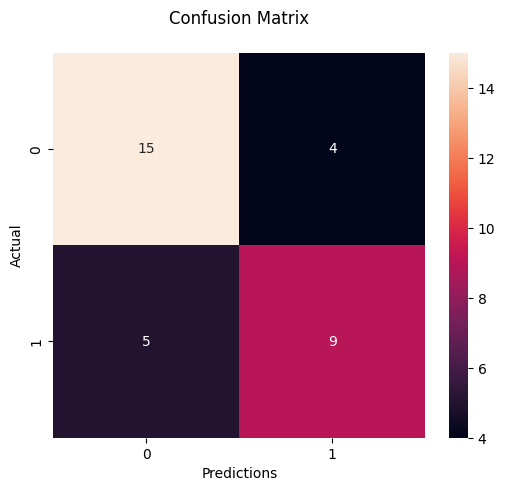

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print(f'True Negatives  | False Positives\n')
print(f'----------------|----------------\n')
print(f'False Negatives | True Positives \n\n')
cm = confusion_matrix(target_test, predictions)
fig, ax = plt.subplots(figsize=(6,5))
ax = sns.heatmap(cm, annot=True, fmt='d')
ax.set(xlabel='Predictions', ylabel='Actual', title='Confusion Matrix\n')
plt.show()

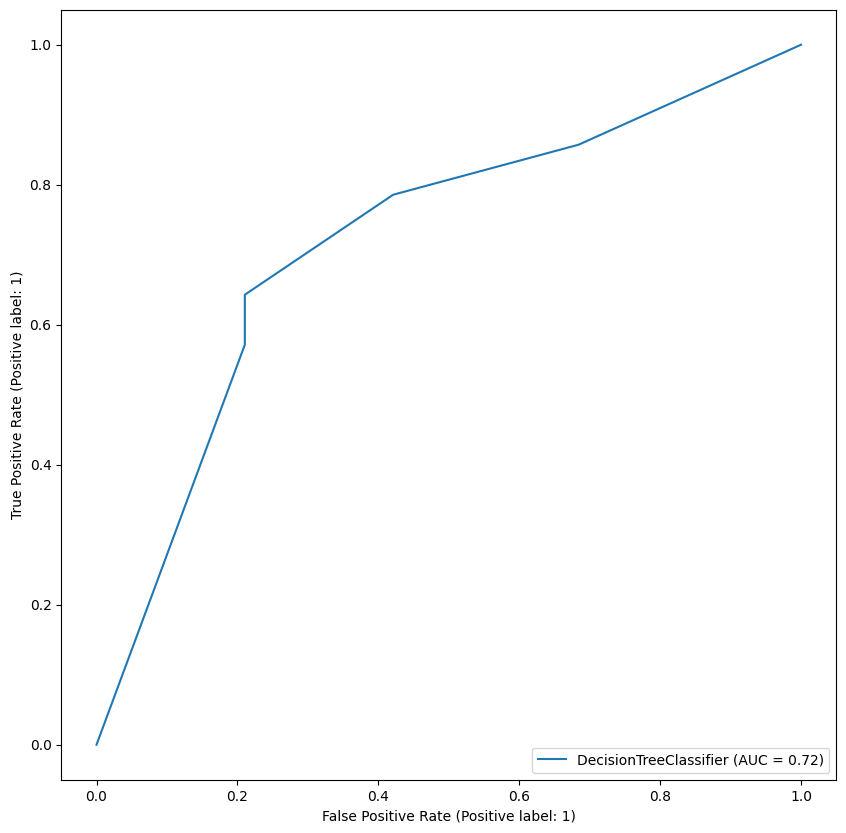

In [ ]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(model, feature_test, target_test)

# Decision Tree Conclusions
It appears from the Decision Tree that "Marital status" is the most important variable in predicting "Depression". It turns out that those with depression are either married or in their first 2 years of college. I can then back that up by filtering the data set by "Marital status" and "Depression". In fact when filtering the data by "Marital status" you can see that every single married respondent says they are depressed. And you can also see that among those students who have "Depression" AND are NOT married all but 2 are in their 1st or 2nd year of college.

In [ ]:
married = mental[(mental['Marital status']==1) & (mental['Depression']==1)]
married.drop(['Biomedical science','Bus. Info Tech','Computer Sci.','Engineering','Islamic Education','Law','Psychology'],axis=1,inplace=True)
not_married = mental[(mental['Marital status']==0) & (mental['Depression']==1)]
not_married.drop(['Biomedical science','Bus. Info Tech','Computer Sci.','Engineering','Islamic Education','Law','Psychology'],axis=1,inplace=True)
print(f'                              MARRIED \n{married}')
print(f'                              NOT MARRIED \n{not_married}')

                              MARRIED 
    Years in College  GPA  Marital status  Depression  Gender_Encoded
3                  3    2               1           1               0
6                  2    1               1           1               0
11                 3    1               1           1               0
17                 4    2               1           1               0
19                 2    1               1           1               0
27                 2    2               1           1               1
28                 3    1               1           1               0
33                 2    1               1           1               1
39                 2    3               1           1               0
49                 1    3               1           1               0
52                 3    2               1           1               0
66                 3    2               1           1               1
71                 3    2               1          

<ipython-input-228-ef6d59080bb5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  married.drop(['Biomedical science','Bus. Info Tech','Computer Sci.','Engineering','Islamic Education','Law','Psychology'],axis=1,inplace=True)
<ipython-input-228-ef6d59080bb5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_married.drop(['Biomedical science','Bus. Info Tech','Computer Sci.','Engineering','Islamic Education','Law','Psychology'],axis=1,inplace=True)


# ***Conclusion***
When taking in to account the Logistic Regression, Decision Tree, and the filtered dataframe above you can see that among students who reported Depression almost half(46%) are Married. Those students who are NOT married and report Depression tend to be in their first two years of college. GPA seems to be a common thread between those with Depression who are married and not married. With all but 2 students reporting Depression having a GPA rank of 1 or 2, or 3.00-4.00 GPA.

Taken as a whole, each evaluation seems to support the other, strengthening the case for the results being valid. If you are a student at the International Islamic Univeristy of Malaysia being married and/or in your first two years of college may be a predictor of a mental health outcome.



---


---


---
